___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()
# Outlier values can deteriorate the clustering quality.
# We should be careful about outliers in clustering algorithms.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.describe()
# Outlier values can deteriorate the clustering quality.
# We should be careful about outliers in clustering algorithms.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


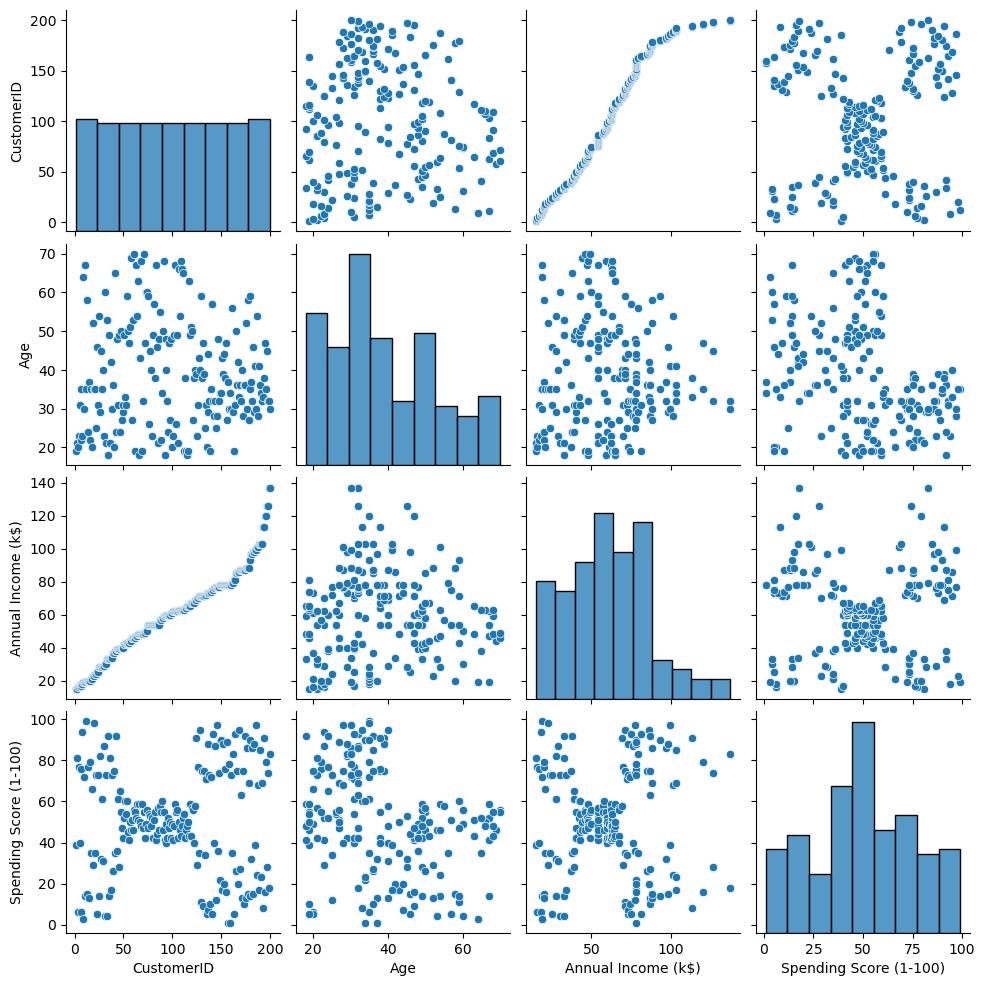

In [6]:
sns.pairplot(df)
plt.show()

# We can get an idea by looking at the scatterplot that "does our data tend to cluster or not?"
# If so, "how many clusters can I divide?"
# We should keep in mind the ideal clustering logic, which we specify as minimal intra cluster distance
# and maximal inter cluster distance, at every stage of clustering problems.

## 3. Cluster Analysis

In [7]:
df["Gender"] = df.Gender.map({
    "Male":0,
    "Female":1,
})

# Targetımdaki numeric verileri daha anlaşılır hala getirmek için dökümanda belirtilen etnik isimlerine göre yeniden
# isimlendiriyoruz.

In [8]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
df1 = df.copy()
df2 = df.copy()

In [11]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.8147905862613944

In [12]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.795031217341758

In [13]:
scaler = MinMaxScaler()
# According to minmaxscaler and standardscaler, I scalled the data in two different ways,
# but the hopkins tests were close to eachother.
# We can either continue with minmaxscaler or standardscaler.

In [14]:
df_Segmented = df.copy()

In [15]:
df_scaled = scaler.fit_transform(df)

In [16]:
df = pd.DataFrame(df_scaled, columns=df.columns)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.0,0.019231,0.000000,0.387755
1,0.005025,0.0,0.057692,0.000000,0.816327
2,0.010050,1.0,0.038462,0.008197,0.051020
3,0.015075,1.0,0.096154,0.008197,0.775510
4,0.020101,1.0,0.250000,0.016393,0.397959


The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [17]:
X = df.iloc[:,[0,2,4]]
# There is no train-test split because it is unsupervised learning!

In [18]:
X.head()

,CustomerID,Age,Spending Score (1-100)
0,0.000000,0.019231,0.387755
1,0.005025,0.057692,0.816327
2,0.010050,0.038462,0.051020
3,0.015075,0.096154,0.775510
4,0.020101,0.250000,0.397959


In [19]:
X.shape

(200, 3)

#### *ii. Determine optimal number of clusters*

## Elbow metod

In [20]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

# Note that we start range from 2, if we start from 1, we will always see 2 as optimal k from elbow.
# inertia is the sum of the distances of the observations in the clusters from their centroids.
# Note that inertia focuses only intra cluster distance.
# The smaller the inertia, the better the clusters surrounded their centroids.

Text(0.5, 1.0, 'elbow method')

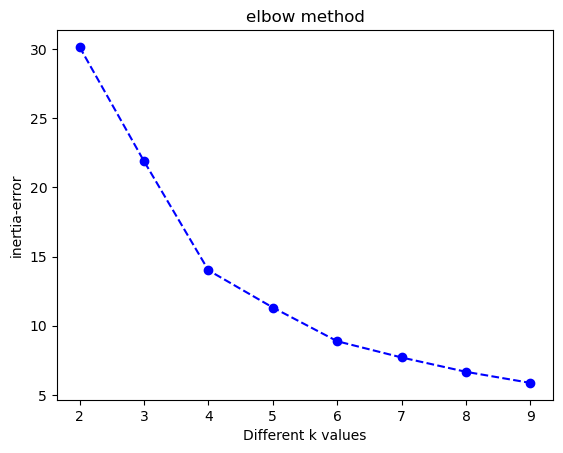

In [21]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [22]:
ssd # sum of squared distance

[30.166957018575552,
 21.903658286351224,
 14.011735253492194,
 11.319209689587836,
 8.879481455671707,
 7.703676243440121,
 6.6664612866384285,
 5.864278731100189]

In [23]:
-pd.Series(ssd).diff()

0         NaN
1    8.263299
2    7.891923
3    2.692526
4    2.439728
5    1.175805
6    1.037215
7    0.802183
dtype: float64

In [24]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(X) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

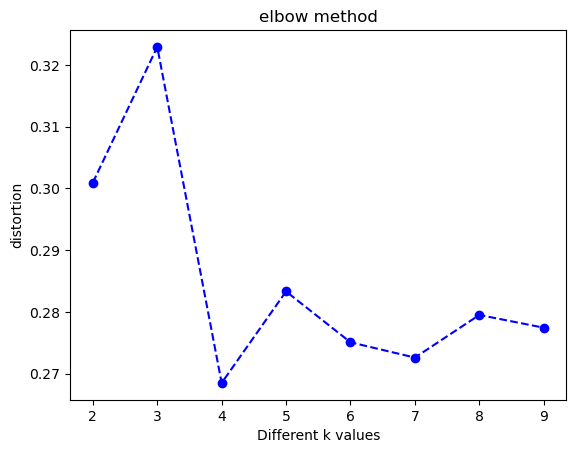

In [25]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [26]:
# According to scatterplot;
# optimal k was like 7-8 , inertia suggested 3 as optimal k , distortion suggested 7-8 .
# But we know that elbow method works by considering inertia and distortion. In ideal clustering,
# distance between clusters was also important for us. Therefore, we will get
# a recommendation for optimal k by doing Silhouette analysis.

### Silhouette_score 

In [27]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [28]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3184766786102438
For n_clusters=3, the silhouette score is 0.33428020603692005
For n_clusters=4, the silhouette score is 0.4411002048253938
For n_clusters=5, the silhouette score is 0.4496375655477858
For n_clusters=6, the silhouette score is 0.45099860026478017
For n_clusters=7, the silhouette score is 0.43998439573232573
For n_clusters=8, the silhouette score is 0.4260017005521983


#### *iii. Apply K Means*

In [29]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [30]:
model.labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [31]:
X["predicted_clusters"] = model.labels_

In [32]:
X

,CustomerID,Age,Spending Score (1-100),predicted_clusters
0,0.000000,0.019231,0.387755,2
1,0.005025,0.057692,0.816327,2
2,0.010050,0.038462,0.051020,2
3,0.015075,0.096154,0.775510,2
4,0.020101,0.250000,0.397959,2
...,...,...,...,...
195,0.979899,0.326923,0.795918,1
196,0.984925,0.519231,0.275510,3
197,0.989950,0.269231,0.744898,1
198,0.994975,0.269231,0.173469,3


In [33]:
X.groupby("predicted_clusters")[["Spending Score (1-100)", "Age"]].apply("mean").sort_values(by = ["Spending Score (1-100)", "Age"], ascending = False) 

,Spending Score (1-100),Age
predicted_clusters,,
1,0.815331,0.283302
2,0.605867,0.142514
0,0.403142,0.689866
3,0.191327,0.428365


In [34]:
X["Segments"] = X.predicted_clusters.map({
    3: "Low Spender Middle Age",
    0: "Spender Adult",
    2: "Spender Young",
    1: "Top Spender Young"
})

# Targetımdaki numeric verileri daha anlaşılır hala getirmek için dökümanda belirtilen etnik isimlerine göre yeniden
# isimlendiriyoruz.

In [35]:
X.Segments.value_counts()

Spender Adult             63
Spender Young             56
Top Spender Young         41
Low Spender Middle Age    40
Name: Segments, dtype: int64

In [36]:
X

,CustomerID,Age,Spending Score (1-100),predicted_clusters,Segments
0,0.000000,0.019231,0.387755,2,Spender Young
1,0.005025,0.057692,0.816327,2,Spender Young
2,0.010050,0.038462,0.051020,2,Spender Young
3,0.015075,0.096154,0.775510,2,Spender Young
4,0.020101,0.250000,0.397959,2,Spender Young
...,...,...,...,...,...
195,0.979899,0.326923,0.795918,1,Top Spender Young
196,0.984925,0.519231,0.275510,3,Low Spender Middle Age
197,0.989950,0.269231,0.744898,1,Top Spender Young
198,0.994975,0.269231,0.173469,3,Low Spender Middle Age


<Axes: xlabel='predicted_clusters', ylabel='Spending Score (1-100)'>

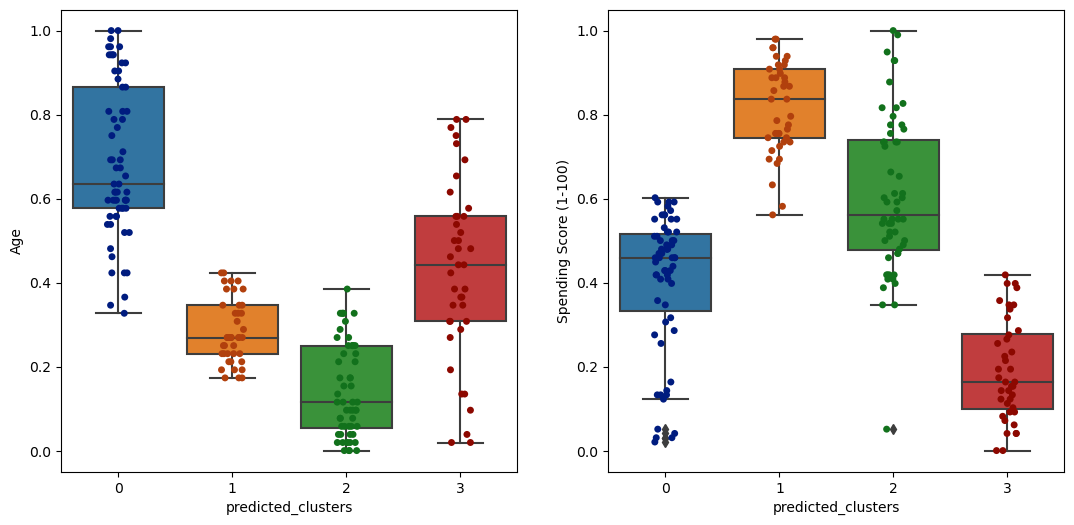

In [37]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Age", x="predicted_clusters", data=X)
sns.stripplot(y="Age", x="predicted_clusters", data=X, palette="dark")

plt.subplot(132)
sns.boxplot(y="Spending Score (1-100)", x="predicted_clusters", data=X)
sns.stripplot(y="Spending Score (1-100)", x="predicted_clusters", data=X, palette="dark")


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [38]:
X = df.iloc[:,[0,3,4]]
# There is no train-test split because it is unsupervised learning!

In [39]:
X

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.000000,0.387755
1,0.005025,0.000000,0.816327
2,0.010050,0.008197,0.051020
3,0.015075,0.008197,0.775510
4,0.020101,0.016393,0.397959
...,...,...,...
195,0.979899,0.860656,0.795918
196,0.984925,0.909836,0.275510
197,0.989950,0.909836,0.744898
198,0.994975,1.000000,0.173469


#### *ii. Determine optimal number of clusters*

Text(0.5, 1.0, 'elbow method')

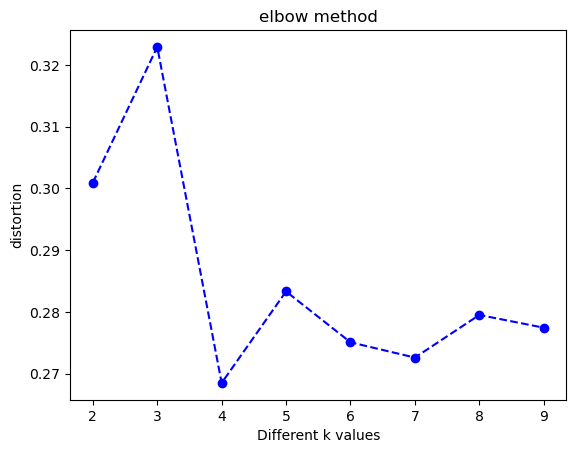

In [40]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

#### *iii. Apply K Means*

In [41]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit_predict(X)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

#### *iv. Visualizing and Labeling All the Clusters*

In [42]:
model.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

#### *iv. Visualizing and Labeling All the Clusters*

In [43]:
X["predicted_clusters"] = model.labels_

In [44]:
X

,CustomerID,Annual Income (k$),Spending Score (1-100),predicted_clusters
0,0.000000,0.000000,0.387755,4
1,0.005025,0.000000,0.816327,2
2,0.010050,0.008197,0.051020,4
3,0.015075,0.008197,0.775510,2
4,0.020101,0.016393,0.397959,4
...,...,...,...,...
195,0.979899,0.860656,0.795918,3
196,0.984925,0.909836,0.275510,1
197,0.989950,0.909836,0.744898,3
198,0.994975,1.000000,0.173469,1


In [45]:
X.groupby("predicted_clusters")[["Spending Score (1-100)", "Annual Income (k$)"]].apply("mean").sort_values(by = ["Spending Score (1-100)"], ascending = False) 

,Spending Score (1-100),Annual Income (k$)
predicted_clusters,,
3,0.827839,0.586381
2,0.791482,0.092659
0,0.498807,0.326379
4,0.203194,0.092659
1,0.179914,0.590164


In [46]:
X["Segments"] = X.predicted_clusters.map({
    3: "Top Premium Spender",
    0: "Top Spender",
    2: "Normal Spender",
    4: "Low Spender",
    1: "Low  Premium Spender"
})

In [47]:
X.Segments.value_counts()

Top Spender             77
Top Premium Spender     39
Low  Premium Spender    38
Low Spender             23
Normal Spender          23
Name: Segments, dtype: int64

In [48]:
X

,CustomerID,Annual Income (k$),Spending Score (1-100),predicted_clusters,Segments
0,0.000000,0.000000,0.387755,4,Low Spender
1,0.005025,0.000000,0.816327,2,Normal Spender
2,0.010050,0.008197,0.051020,4,Low Spender
3,0.015075,0.008197,0.775510,2,Normal Spender
4,0.020101,0.016393,0.397959,4,Low Spender
...,...,...,...,...,...
195,0.979899,0.860656,0.795918,3,Top Premium Spender
196,0.984925,0.909836,0.275510,1,Low Premium Spender
197,0.989950,0.909836,0.744898,3,Top Premium Spender
198,0.994975,1.000000,0.173469,1,Low Premium Spender


<Axes: xlabel='predicted_clusters', ylabel='Spending Score (1-100)'>

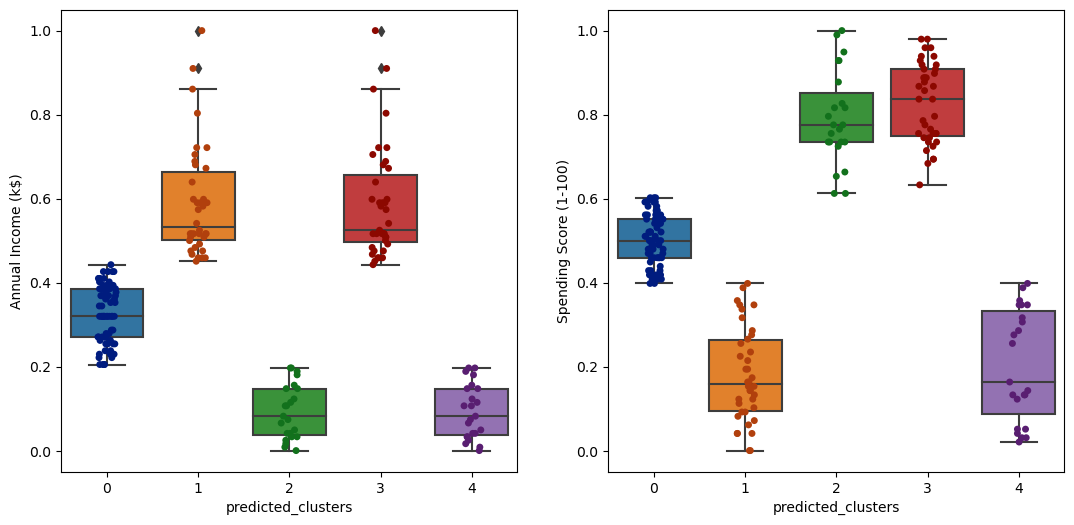

In [49]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y="Annual Income (k$)", x="predicted_clusters", data=X)
sns.stripplot(y="Annual Income (k$)", x="predicted_clusters", data=X, palette="dark")

plt.subplot(132)
sns.boxplot(y="Spending Score (1-100)", x="predicted_clusters", data=X)
sns.stripplot(y="Spending Score (1-100)", x="predicted_clusters", data=X, palette="dark")


<Figure size 2000x1000 with 0 Axes>

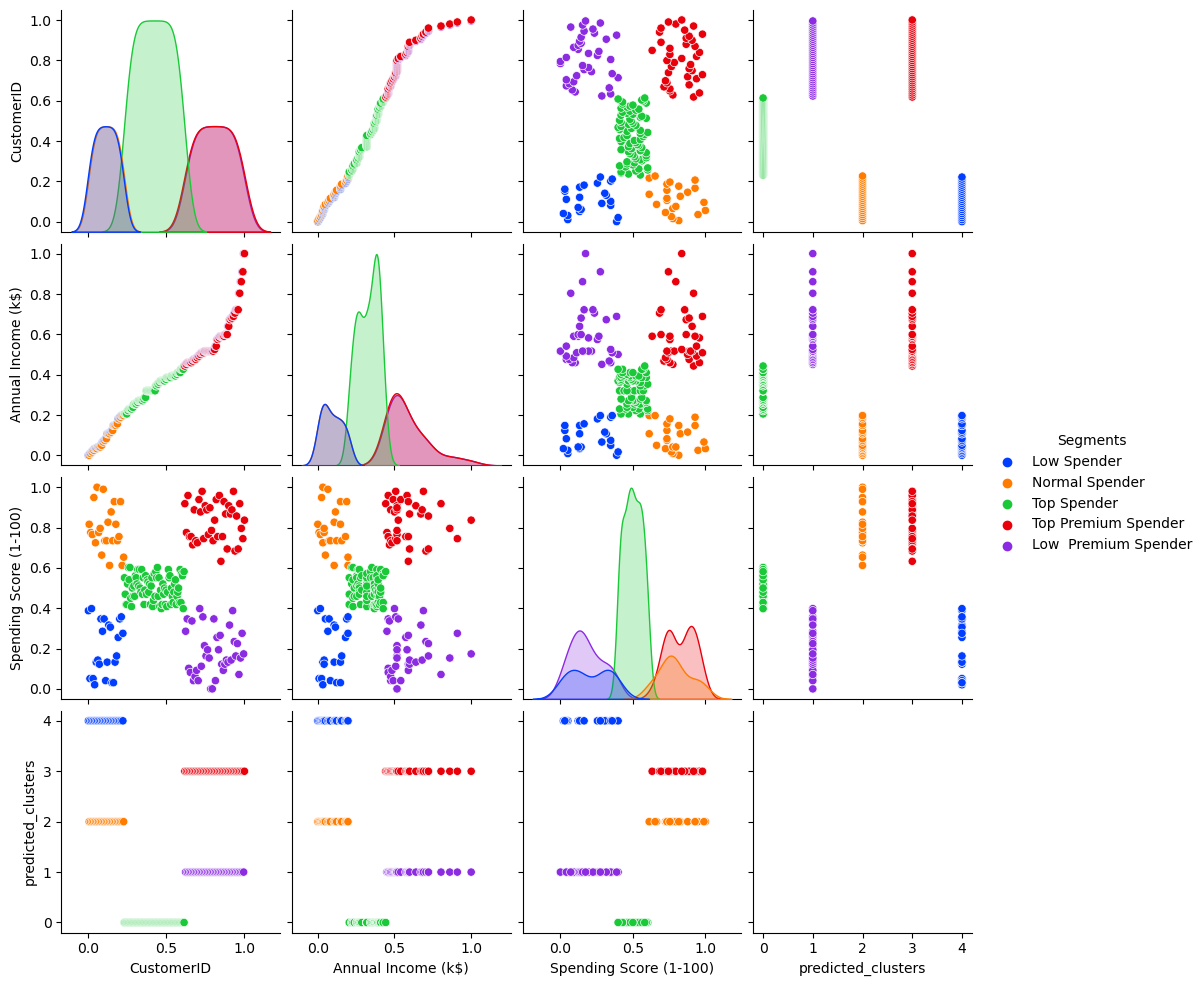

In [50]:
plt.figure(figsize=(20,10))
sns.pairplot(data=X, hue="Segments", palette="bright");

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [51]:
X = df.iloc[:,[0,2,4]]
# There is no train-test split because it is unsupervised learning!

In [52]:
X.head()

,CustomerID,Age,Spending Score (1-100)
0,0.000000,0.019231,0.387755
1,0.005025,0.057692,0.816327
2,0.010050,0.038462,0.051020
3,0.015075,0.096154,0.775510
4,0.020101,0.250000,0.397959


In [53]:
X.shape

(200, 3)

In [54]:
hopkins(X, 1)

0.6838610938461541

In [55]:
result=[]
for _ in range(10):
    result.append(hopkins(X, 1))
np.mean(result)

0.6780617487429673

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [57]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

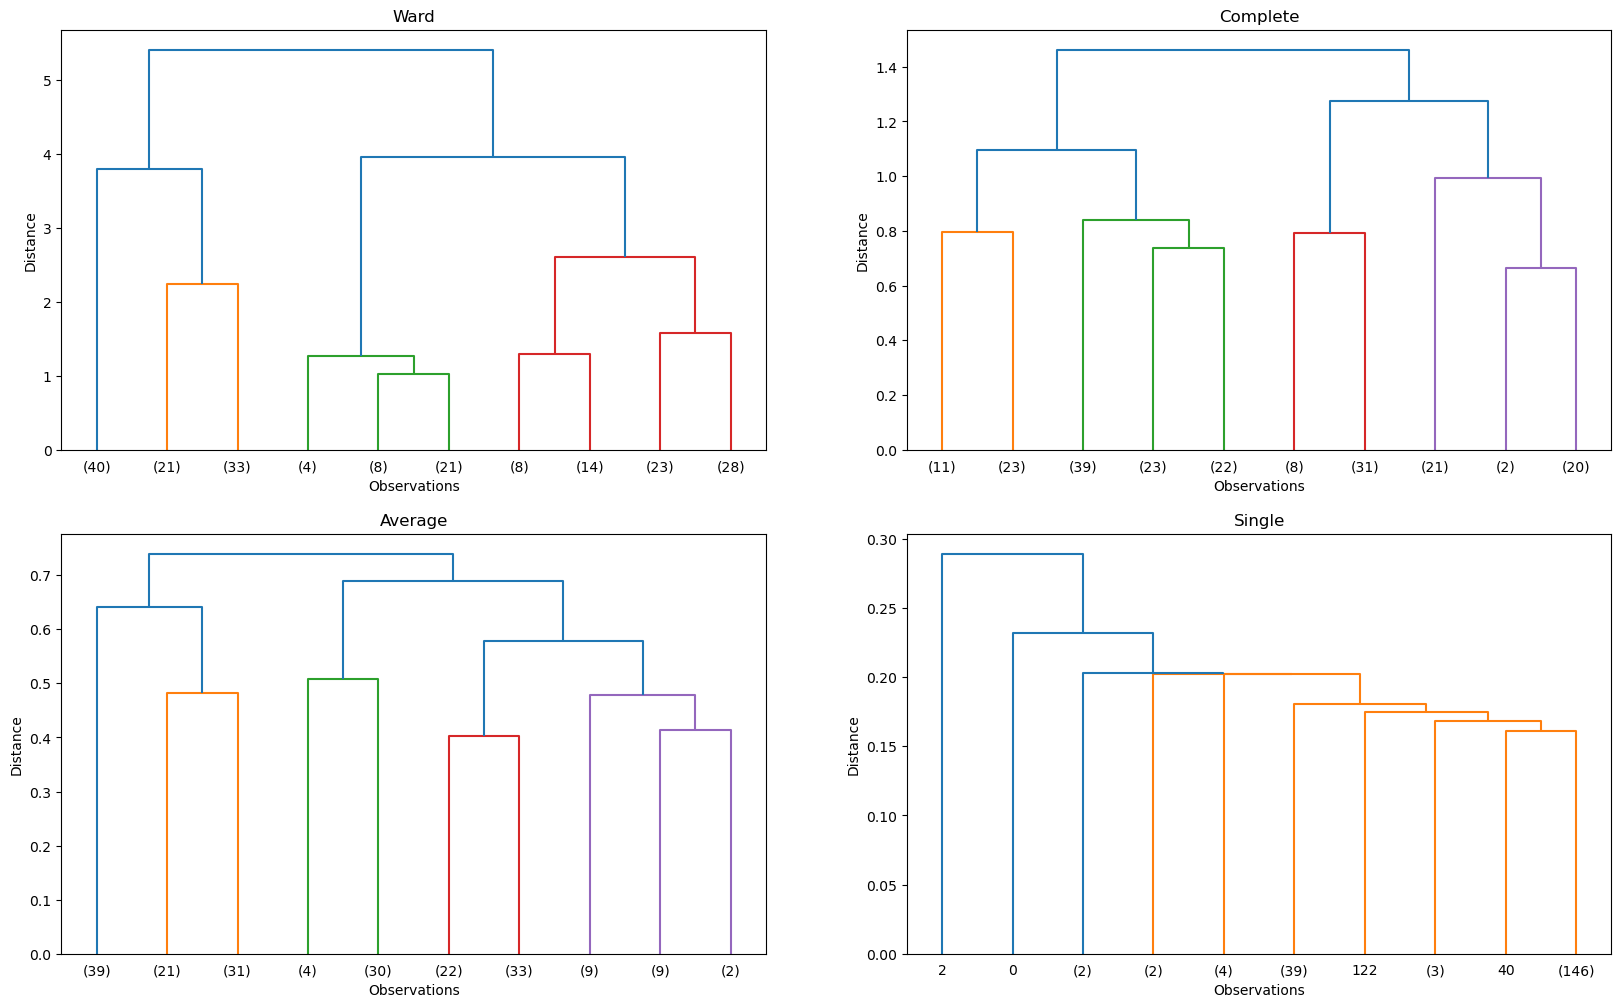

In [58]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

## Clustering based on Annual Income and Spending Score- x2

In [59]:
X2 = df.iloc[:,[0,3,4]]
# There is no train-test split because it is unsupervised learning!

In [60]:
X2.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.000000,0.387755
1,0.005025,0.000000,0.816327
2,0.010050,0.008197,0.051020
3,0.015075,0.008197,0.775510
4,0.020101,0.016393,0.397959


In [61]:
X2.shape

(200, 3)

In [62]:
hopkins(X2, 1)

0.8938528106688785

In [63]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

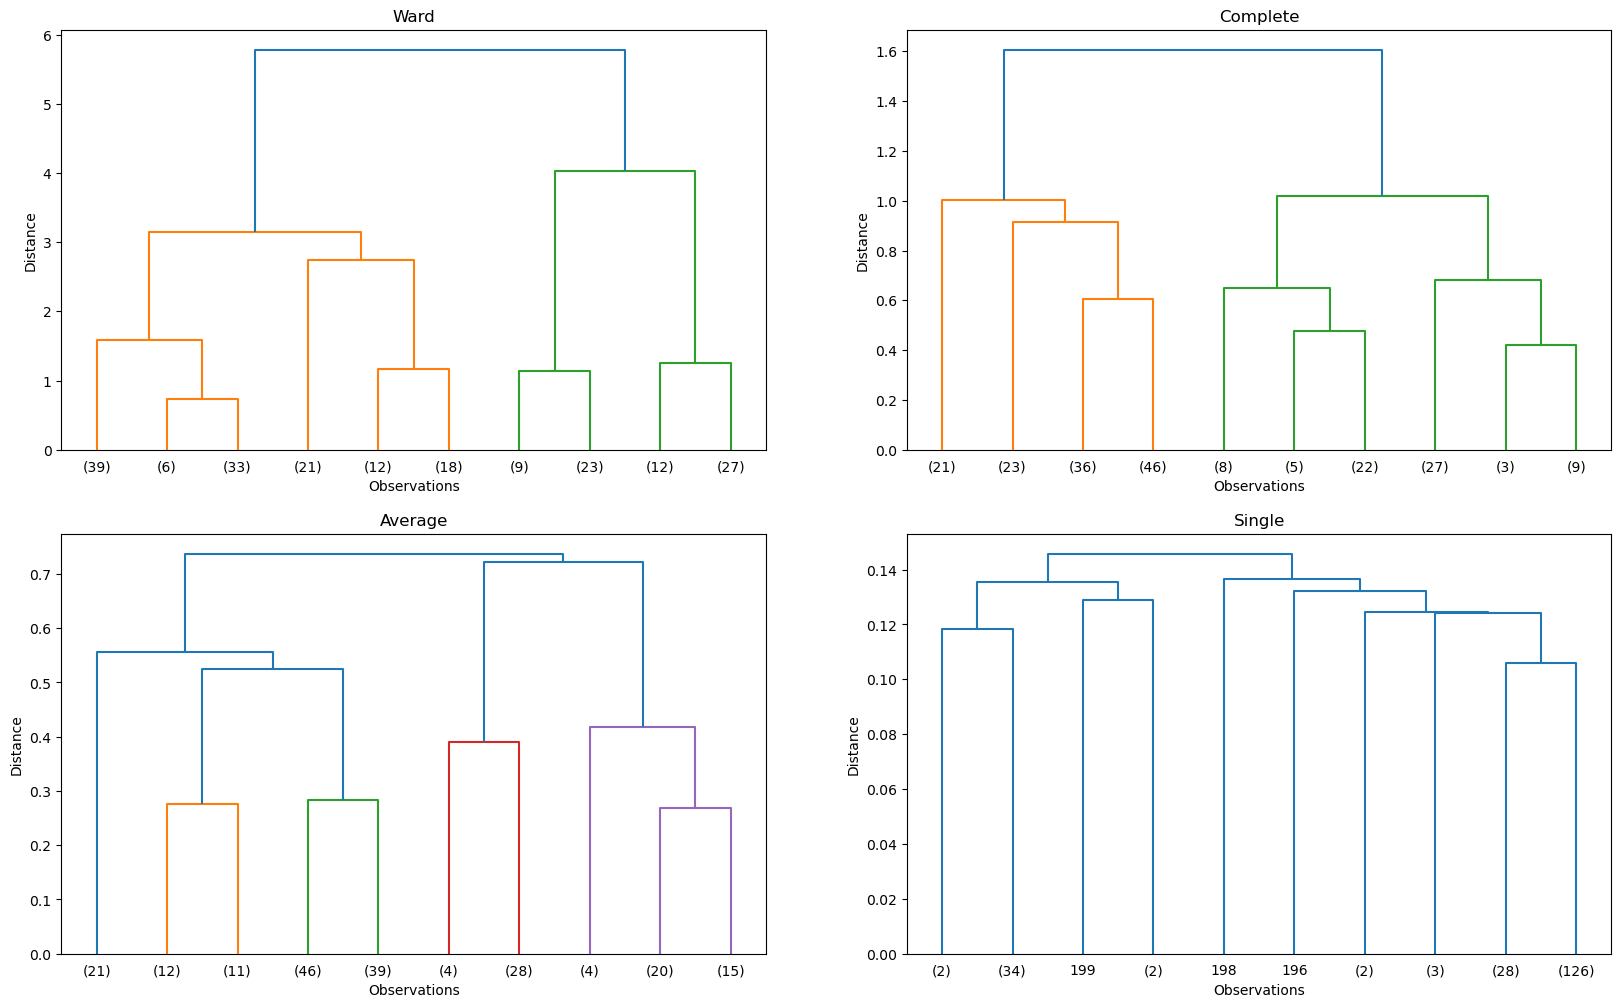

In [64]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
from sklearn.metrics import silhouette_score

In [67]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.3137842740262311
Silhouette Score for 3 clusters: 0.3508822292121633
Silhouette Score for 4 clusters: 0.4185158008244134
Silhouette Score for 5 clusters: 0.43771414316803275
Silhouette Score for 6 clusters: 0.44215282604043543
Silhouette Score for 7 clusters: 0.41013901395857644
Silhouette Score for 8 clusters: 0.41557976503738986
Silhouette Score for 9 clusters: 0.41112336606722694


In [68]:
model = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X)

In [69]:
X["clusters"] = clusters
X.head()

,CustomerID,Age,Spending Score (1-100),clusters
0,0.000000,0.019231,0.387755,4
1,0.005025,0.057692,0.816327,0
2,0.010050,0.038462,0.051020,4
3,0.015075,0.096154,0.775510,0
4,0.020101,0.250000,0.397959,4


#### Annual Income and Spending Score- x2

In [70]:
model = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X2)

In [71]:
X2["clusters"] = clusters
X2.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),clusters
0,0.000000,0.000000,0.387755,3
1,0.005025,0.000000,0.816327,4
2,0.010050,0.008197,0.051020,3
3,0.015075,0.008197,0.775510,4
4,0.020101,0.016393,0.397959,3


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Figure size 2000x1000 with 0 Axes>

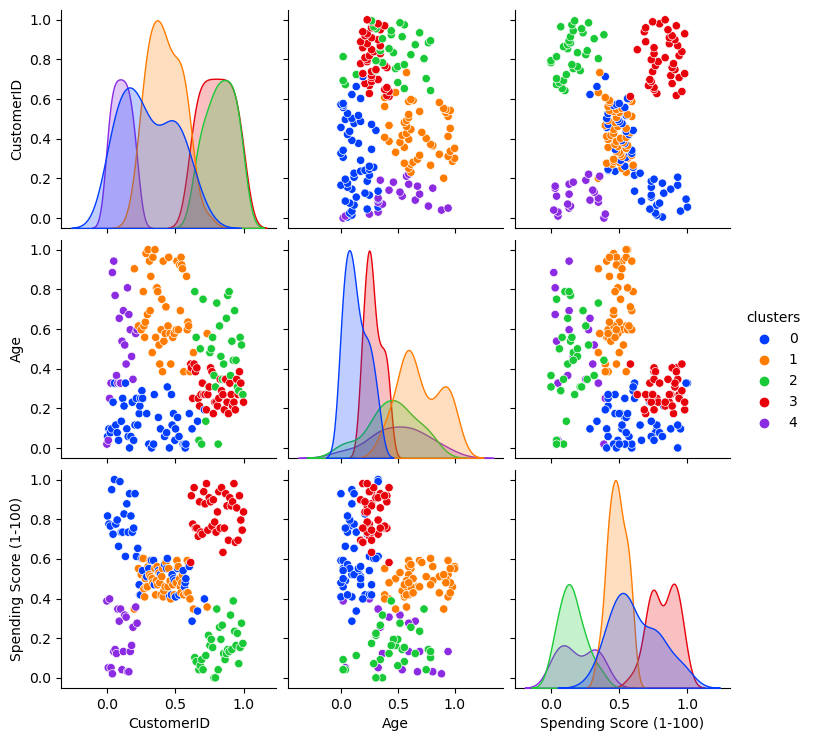

In [72]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X, hue="clusters", palette="bright");
# According to the 2 clusters, we see that the cluster does not make a good distinction between states according to crime.
# For this reason, we will make 4 clusters and re-examine our visuals as states with less crime and more crime.

#### Annual Income and Spending Score- x2

<Figure size 2000x1000 with 0 Axes>

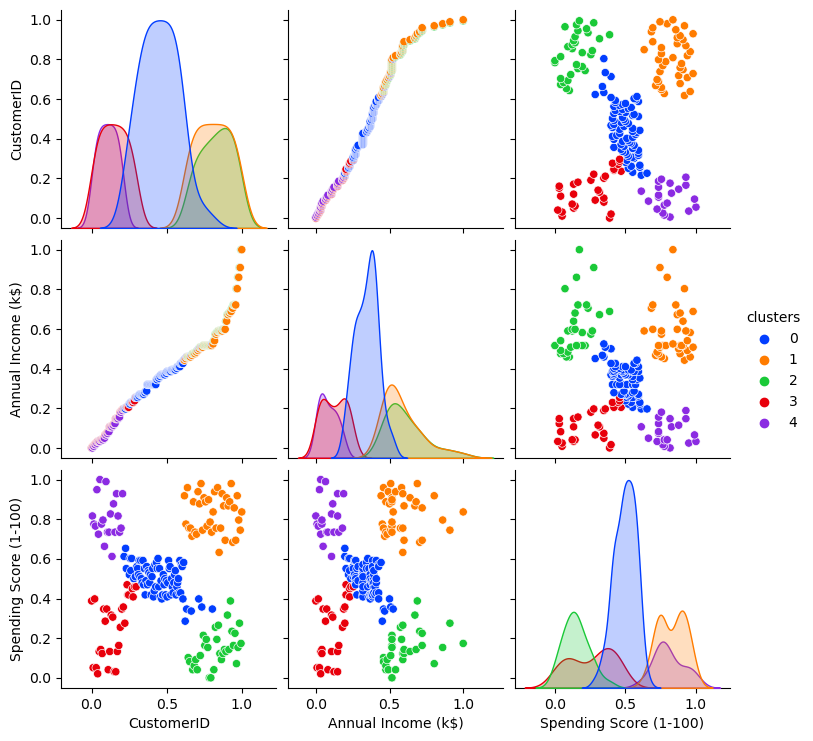

In [73]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X2, hue="clusters", palette="bright");
# According to the 2 clusters, we see that the cluster does not make a good distinction between states according to crime.
# For this reason, we will make 4 clusters and re-examine our visuals as states with less crime and more crime.

#### Interpretation based on Age and Spending Score- x1

In [74]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.0,0.019231,0.000000,0.387755
1,0.005025,0.0,0.057692,0.000000,0.816327
2,0.010050,1.0,0.038462,0.008197,0.051020
3,0.015075,1.0,0.096154,0.008197,0.775510
4,0.020101,1.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,1.0,0.326923,0.860656,0.795918
196,0.984925,1.0,0.519231,0.909836,0.275510
197,0.989950,0.0,0.269231,0.909836,0.744898
198,0.994975,0.0,0.269231,1.000000,0.173469


In [75]:
X2

,CustomerID,Annual Income (k$),Spending Score (1-100),clusters
0,0.000000,0.000000,0.387755,3
1,0.005025,0.000000,0.816327,4
2,0.010050,0.008197,0.051020,3
3,0.015075,0.008197,0.775510,4
4,0.020101,0.016393,0.397959,3
...,...,...,...,...
195,0.979899,0.860656,0.795918,1
196,0.984925,0.909836,0.275510,2
197,0.989950,0.909836,0.744898,1
198,0.994975,1.000000,0.173469,2


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___